# EXPLORATORY DATA ANALYSIS ( Haberman Data Set )


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
import warnings 
warnings.filterwarnings("ignore") 


In [61]:
haber=pd.read_csv("haberman.csv")

In [62]:
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


 Understanding Of Dataset
 
 * Age - age of the person at the time of operation.
 * Year - patient's year of operation.
 * Nodes - implies whether cancer affected the lymph node,if it is positive node cancer has been          spread to lymph nodes.
 * Status - 1 = the patient survived 5 years or longer. 
            2 = the patient died within 5 year.
 


# Statistical Analysis

In [63]:
print(haber.shape)
print(haber.shape[0])

(306, 4)
306


In [53]:
print(haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [54]:
print(haber['status'].nunique())
print(haber['status'].unique())

2
[1 2]


In [55]:
print(haber['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


 Observations

* there are 306 data points are present in the data set.
* data set consist of 3 input variable(age , year ,nodes) and one output variable(status).
* ouput variable has 2 class label(1,2).
* it is a inbalanced data set.
* the data set consist patients survied for 5 years or more large in number.

<font size="5">Objective - Whether the patient survived more than 5 years or not.</font>

# Bi-Variate Analysis

## 2D Scatter Plot

<Figure size 432x288 with 0 Axes>

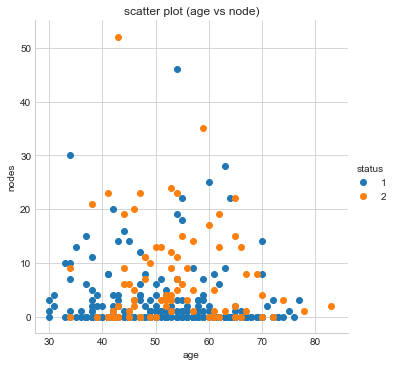

In [26]:
plt.figure()
sns.set_style("whitegrid")
g=sns.FacetGrid(haber,hue="status",size=5)
g.map(plt.scatter,'age','nodes')
plt.title("scatter plot (age vs node)")
g.add_legend()

## Pair Plot

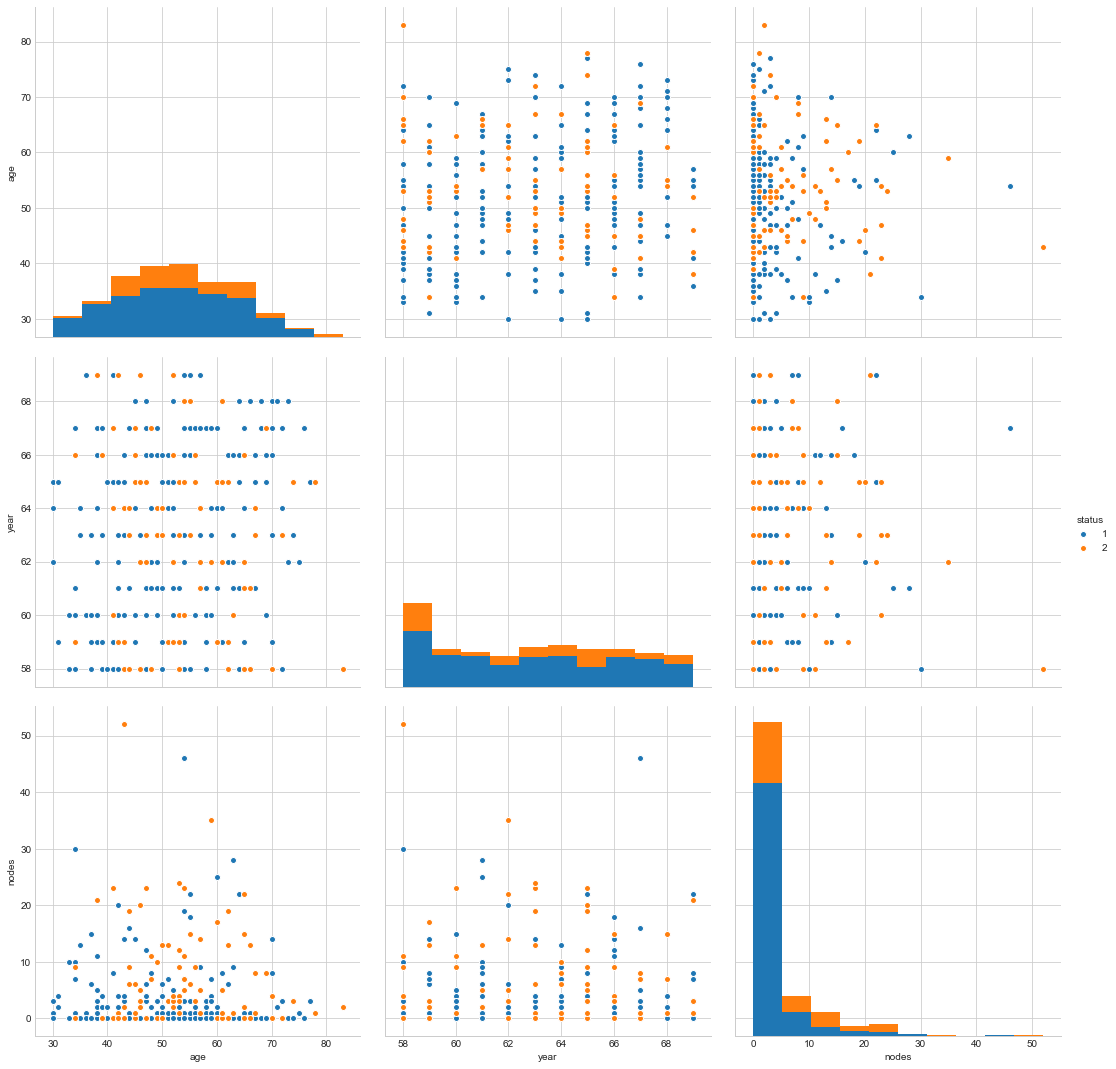

In [68]:
sns.pairplot(haber,hue="status",vars=["age","year","nodes"],size=5)


Observations
* from above plot we not getting any useful information.
* all data points are spread across in the status labels.

#                  Uni-Variate Analysis

## Histogram

Text(0.5,1,'Histogram Of Age')

<Figure size 432x288 with 0 Axes>

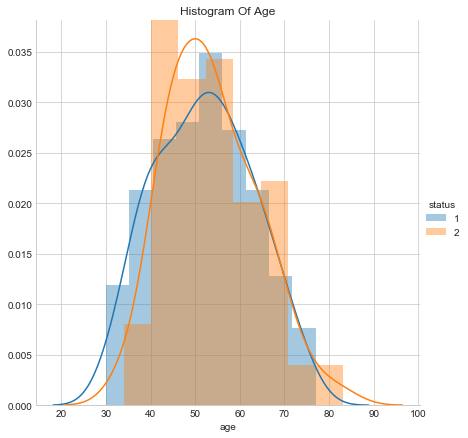

In [33]:
plt.figure()
g=sns.FacetGrid(haber,hue="status",size=6)
g.map(sns.distplot,"age")
g.add_legend()
plt.title("Histogram Of Age")

<Figure size 432x288 with 0 Axes>

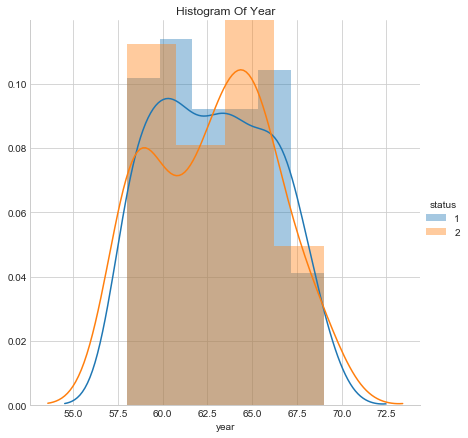

In [56]:
plt.figure()
g=sns.FacetGrid(haber,hue="status",size=6)
g.map(sns.distplot,"year")
plt.title("Histogram Of Year")
g.add_legend()

<Figure size 432x288 with 0 Axes>

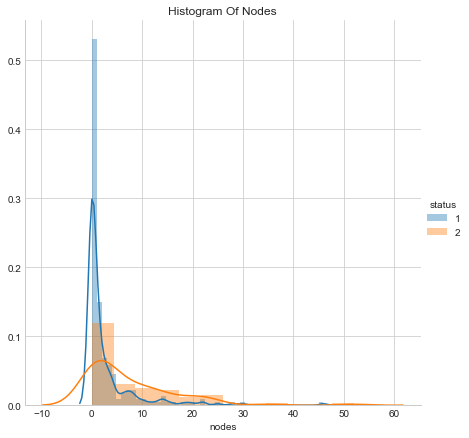

In [35]:
plt.figure()
g=sns.FacetGrid(haber,hue="status",size=6)
g.map(sns.distplot,"nodes")
plt.title("Histogram Of Nodes")
g.add_legend()

observations
* we not get into a good conclusion from histograms.
* feature 'age and year' is not relavant for classification of status because there is higher overlapping     between   class labels.
* faeture variable 'node' is more relavant for classification.so need to more concentrate on node variable

## Pdf And Cdf

In [14]:
haber_1 = haber.loc[haber["status"] == 1]
haber_2 = haber.loc[haber["status"] == 2]

bin edges [ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
 
probability density function
 
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
 
Cumulative distribution function
 
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


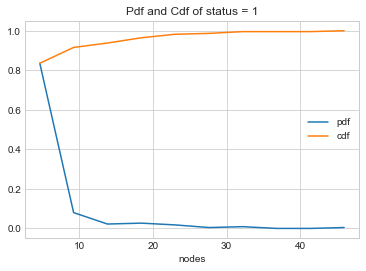

In [36]:
count,edges=np.histogram(haber_1['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.xlabel("nodes")
plt.title("Pdf and Cdf of status = 1")
plt.legend()

observations
* about 92% patients who survived have postive  node between 0 to 10 
* only 3-4% of pattients survived have nodes greater than 15

bin edges [ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
 
probability density function
 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
 
Cumulative distribution function
 
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


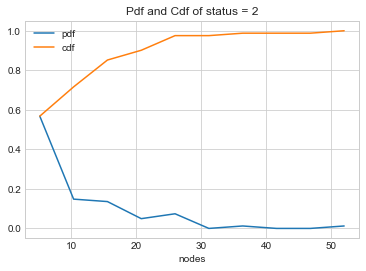

In [37]:
count,edges=np.histogram(haber_2['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.xlabel("nodes")
plt.title("Pdf and Cdf of status = 2")
plt.legend()

observations
* about 72% patients who not survived have 0 to 10 nodes
* patients who not survived contains more number of nodes

## Box Plot

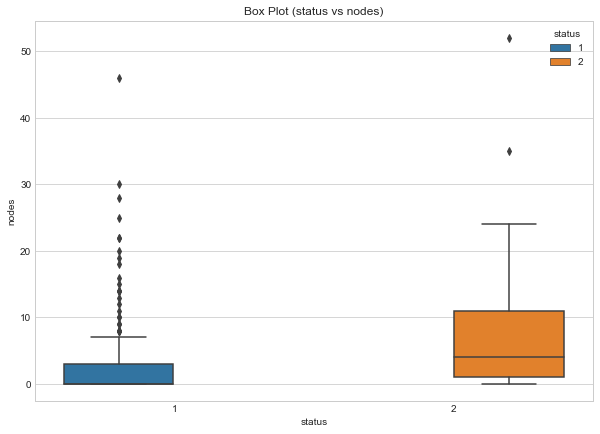

In [57]:
plt.figure(figsize=(10,7))
plt.title("Box Plot (status vs nodes)")
sns.boxplot(data=haber,x='status',y='nodes',hue='status')

observations
* about 50% of patients who survived(status =1) have no positive nodes
* large number of outlier is present even if positive node is high some patients are survived


## Violin Plot

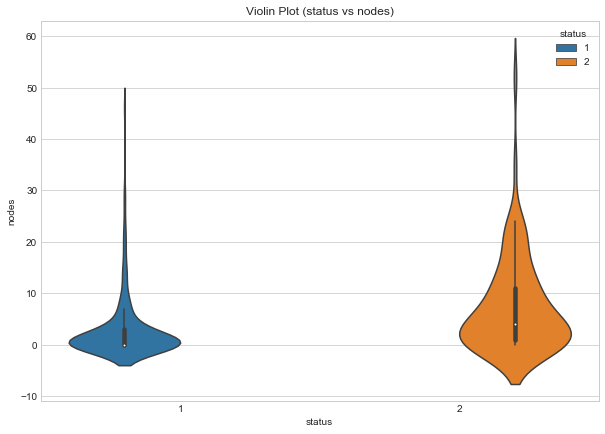

In [58]:
plt.figure(figsize=(10,7))
plt.title("Violin Plot (status vs nodes)")
sns.violinplot(data=haber,x='status',y='nodes',hue='status')

observations
* for status 1 patients nodes are densed bottom indicates status 1 patients have less number of nodes
* significant number of nodes are present for status 2 patients.

## Mean , Std , Median , Percentile , Quantiles and Mad

In [17]:
from statsmodels import robust

In [18]:
print("************************STATUS 1****************************")
print(" ")
print("mean =",np.mean(haber_1['nodes']))
print(" ")
print("standard deviation =",np.std(haber_1['nodes']))
print(" ")
print("median =",np.median(haber_1['nodes']))
print(" ")
print("90th percentile =",np.percentile(haber_1['nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(haber_1['nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(haber_1["nodes"]))

************************STATUS 1****************************
 
mean = 2.7911111111111113
 
standard deviation = 5.857258449412131
 
median = 0.0
 
90th percentile = 8.0
 
quantiles (25%, 50% and 75%) = [0. 0. 3.]
 
median absolute deviation 0.0


In [19]:
print("************************STATUS 2****************************")
print(" ")
print("mean =",np.mean(haber_2['nodes']))
print(" ")
print("standard deviation =",np.std(haber_2['nodes']))
print(" ")
print("median =",np.median(haber_2['nodes']))
print(" ")
print("90th percentile =",np.percentile(haber_2['nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(haber_2['nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(haber_2["nodes"]))

************************STATUS 2****************************
 
mean = 7.45679012345679
 
standard deviation = 9.128776076761632
 
median = 4.0
 
90th percentile = 20.0
 
quantiles (25%, 50% and 75%) = [ 1.  4. 11.]
 
median absolute deviation 5.930408874022408


observations
* from above informations patients who survived has lesser average on nodes.
* 90% of  patients who survived has nodes <= 8 and 90%  of patients who not survived has node<=20.
* nodes of patient status 1 is less spreaded

In [20]:
haber.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


observation
* averge node present in patients who survived is less than averge node of whole data set.

In [21]:
haber_0=haber.loc[haber['nodes']<=0]

In [22]:
haber_0.shape

(136, 4)

## Count Plot

Text(0.5,1,'count plot of node =0')

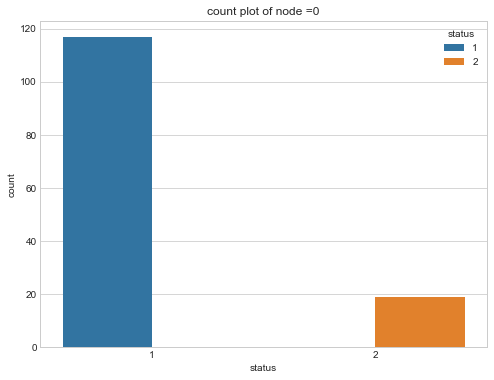

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x="status",data=haber_0,hue="status")
plt.title("count plot of node =0")


observation
* in the data 136 points have node =0
* in the 136 patients more than 85% of patients survived

<font size="5">Conclusion</font>

* it is a inbalanced data set.
* features age and year is not good for classification.
* feature "nodes' is relavant for classification but we cannot proceed simply with node feature only.
* patients who survived have lesser number of nodes or positive node equal to zero.
* we need more features for classification